In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [3]:
df=pd.read_csv('weather delhi.csv')
df.head(3)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [5]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


Missing Data Treatment

In [6]:
drop_cols = ['datetime_utc',' _heatindexm',' _precipm',' _wgustm',' _windchillm']
df.drop(drop_cols, axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
# Renaming Columns
#df.rename(columns={' _cond':'conds'})
df.rename(columns = {col:col.lstrip(' _') for col in df.columns}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80891 entries, 0 to 100989
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   conds      80891 non-null  object 
 1   dewptm     80891 non-null  float64
 2   fog        80891 non-null  int64  
 3   hail       80891 non-null  int64  
 4   hum        80891 non-null  float64
 5   pressurem  80891 non-null  float64
 6   rain       80891 non-null  int64  
 7   snow       80891 non-null  int64  
 8   tempm      80891 non-null  float64
 9   thunder    80891 non-null  int64  
 10  tornado    80891 non-null  int64  
 11  vism       80891 non-null  float64
 12  wdird      80891 non-null  float64
 13  wdire      80891 non-null  object 
 14  wspdm      80891 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.9+ MB


In [10]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wdire', 'wspdm'],
      dtype='object')

In [11]:
# cat_cols=['conds','wdire']
# num_cols=['dewptm', 'fog', 'hail', 'hum',
#          'pressurem', 'rain', 'snow','tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wdire', 'wspdm']

In [12]:
for col in df.columns:
    print(f'{col}:{df[col].nunique()}')
    print(df[col].unique())
    print('-'*20)

conds:37
['Smoke' 'Clear' 'Haze' 'Unknown' 'Scattered Clouds' 'Shallow Fog'
 'Mostly Cloudy' 'Fog' 'Partly Cloudy' 'Patches of Fog'
 'Thunderstorms and Rain' 'Overcast' 'Rain' 'Light Rain' 'Drizzle' 'Mist'
 'Light Drizzle' 'Thunderstorm' 'Light Thunderstorms and Rain'
 'Light Thunderstorm' 'Squalls' 'Heavy Rain' 'Light Haze'
 'Widespread Dust' 'Funnel Cloud' 'Heavy Thunderstorms and Rain'
 'Heavy Thunderstorms with Hail' 'Light Rain Showers'
 'Thunderstorms with Hail' 'Partial Fog' 'Heavy Fog' 'Light Fog'
 'Blowing Sand' 'Sandstorm' 'Light Hail Showers' 'Light Sandstorm'
 'Rain Showers']
--------------------
dewptm:50
[  9.  11.  13.  10.   8.   7.  12.  14.   5.   6.   4.   2.   1.   3.
  -1.   0.  -4.  -2.  -3.  -5.  -7.  -6.  15.  16.  27.  17.  18.  19.
  20.  21.  24.  22.  23.  28.  26.  25.  29.  30.  31.  32.  33. -24.
 -12. -23.  -8.  35. -14.  -9. -21. -11.]
--------------------
fog:2
[0 1]
--------------------
hail:2
[0 1]
--------------------
hum:97
[ 27.  47.  60.  52.  46

In [13]:
# Remove the Pressure Outlier
df = df[df['pressurem']< df['pressurem'].max()]
df['pressurem'].sort_values(ascending=False).head()


94128    101014.0
18235     11020.0
53158     11019.0
18756     11015.0
24194     11014.0
Name: pressurem, dtype: float64

In [14]:
# Remove Visibility Outlier
df = df[df['vism']< df['vism'].max()]
df['vism'].sort_values(ascending=False).head()


68751    60.0
88068    55.0
94793    55.0
78448    50.0
62986    10.0
Name: vism, dtype: float64

In [15]:

def find_outlier(col):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    max_lim = (iqr * 1.5) + q3
    min_lim = q1 - (iqr * 1.5)
    return min_lim, max_lim


In [16]:
# Remove Wind Direction Outlier
_, max_lim_wdird = find_outlier('wdird')
print(max_lim_wdird)
df = df[df['wdird']< max_lim_wdird]
df['wdird'].sort_values(ascending=False).head(10)

585.0


36396    390.0
39522    390.0
59471    360.0
33364    360.0
33305    360.0
33351    360.0
33358    360.0
48540    360.0
33384    360.0
48583    360.0
Name: wdird, dtype: float64

In [17]:
# Remove Wind Speed Outlier - Did not work
_, max_lim_wspdm = find_outlier('wspdm')
print(max_lim_wspdm)
df['wspdm'].sort_values(ascending=False).head()

26.950000000000003


3902     1514.9
44590    1492.7
53831     999.9
6058      999.9
6059      999.9
Name: wspdm, dtype: float64

In [18]:
cat_cols = ['fog', 'hail','rain', 'snow','thunder', 'tornado',]
num_cols = ['dewptm', 'pressurem', 'hum',  'vism', 'wdird', 'wspdm']
target_col = 'tempm'

fog
0    76779
1     4106
Name: fog, dtype: int64


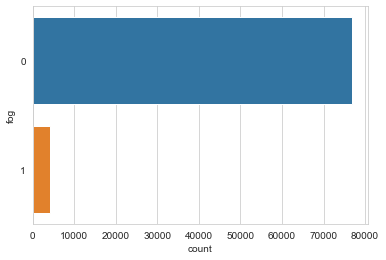

hail
0    80874
1       11
Name: hail, dtype: int64


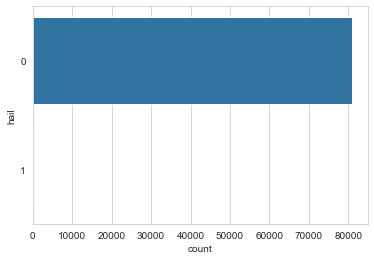

rain
0    78699
1     2186
Name: rain, dtype: int64


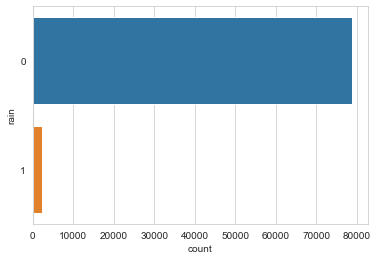

snow
0    80884
1        1
Name: snow, dtype: int64


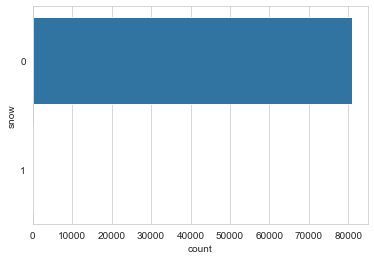

thunder
0    80061
1      824
Name: thunder, dtype: int64


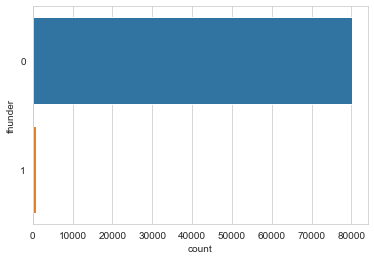

tornado
0    80883
1        2
Name: tornado, dtype: int64


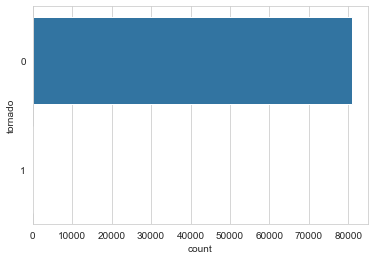

dewptm


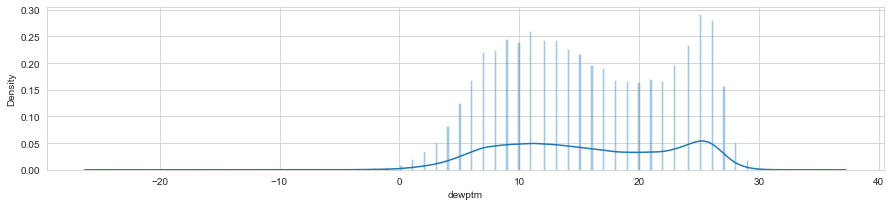

pressurem


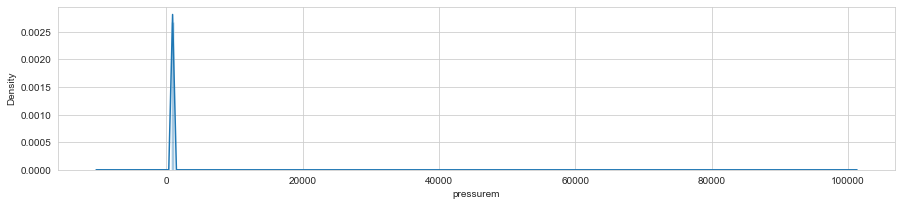

hum


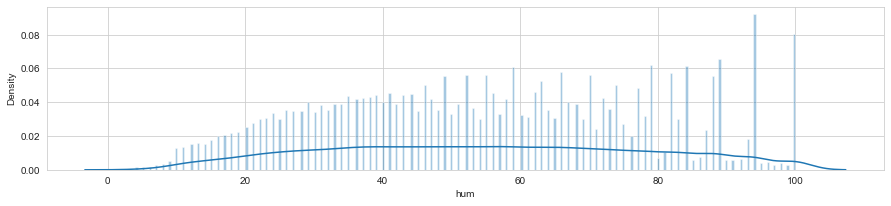

vism


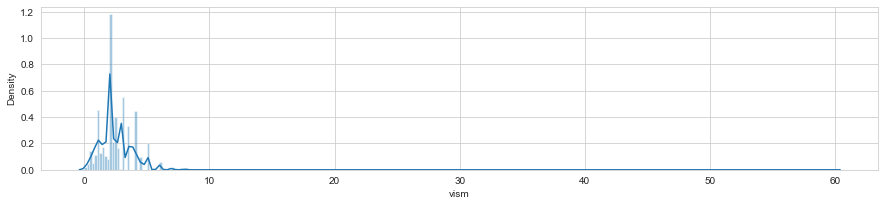

wdird


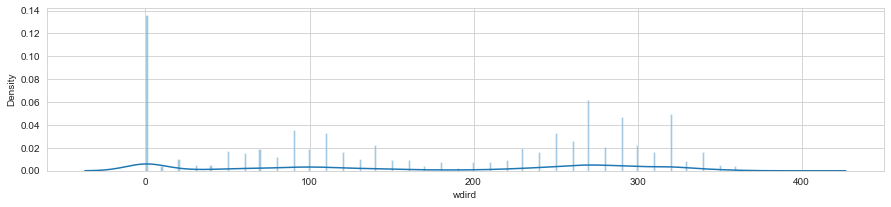

wspdm


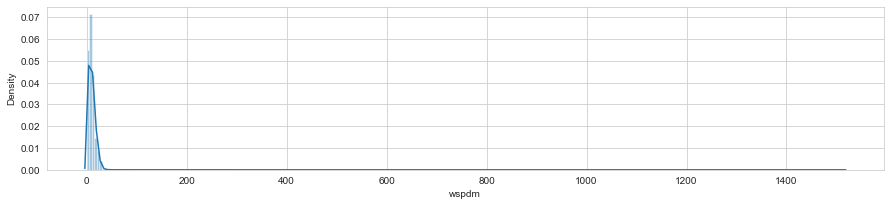

fog


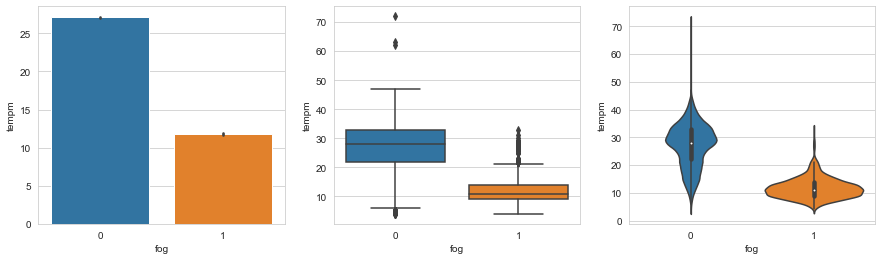

hail


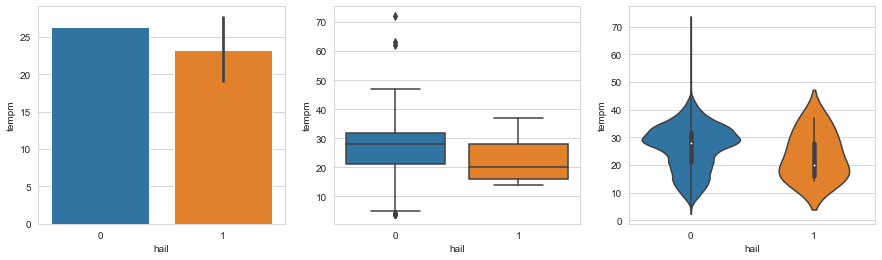

rain


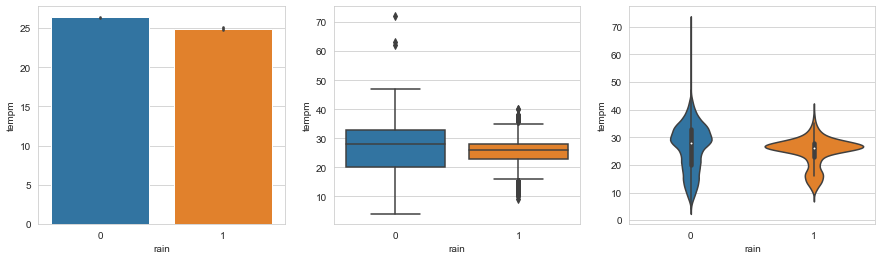

snow


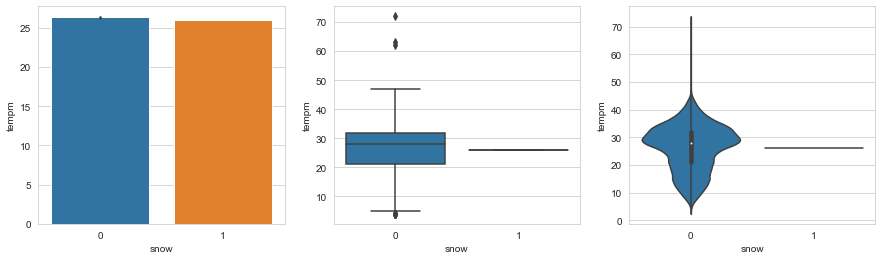

thunder


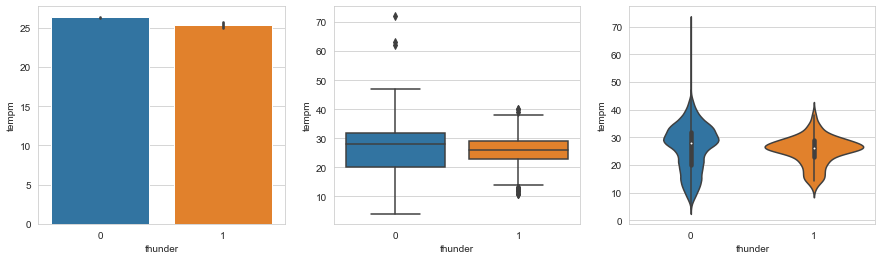

tornado


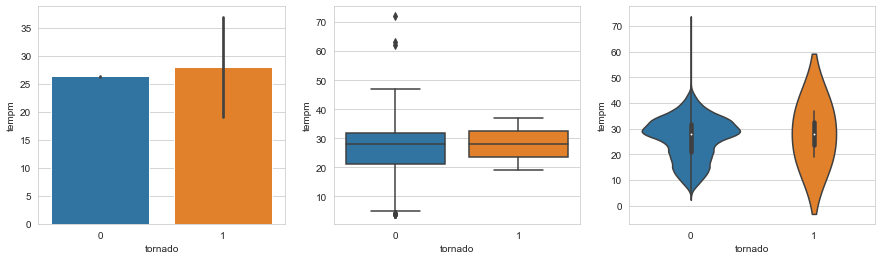

dewptm


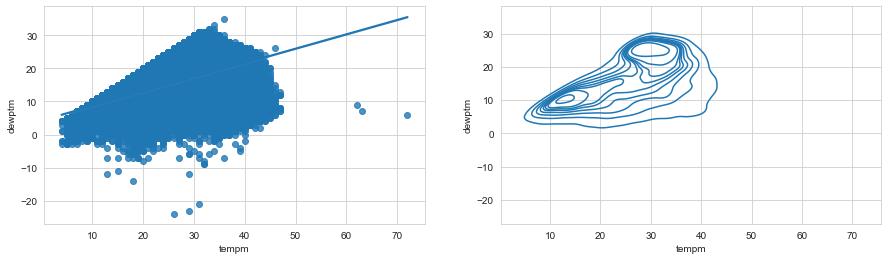

pressurem


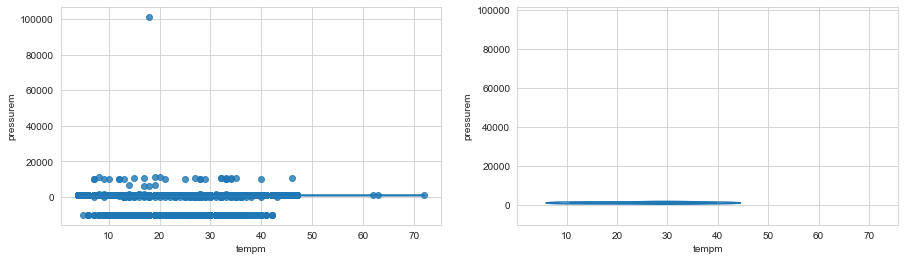

hum


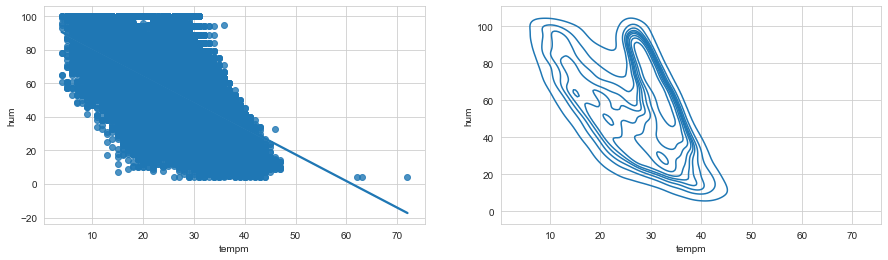

vism


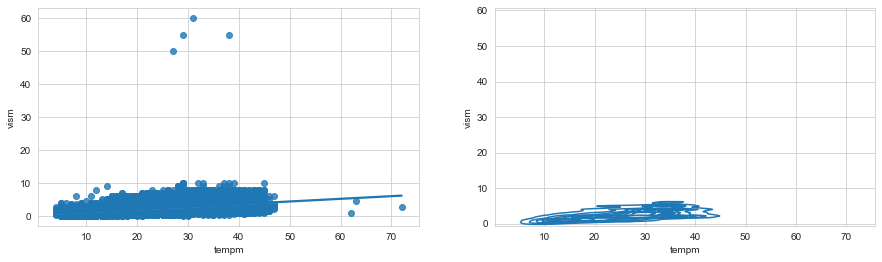

wdird


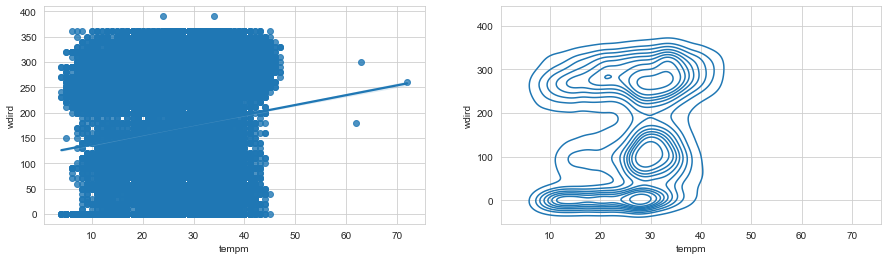

wspdm


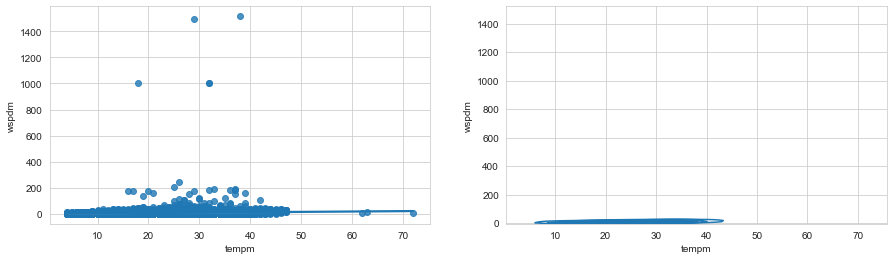

In [21]:
# Univariate Analysis
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data = df, y=col)
    plt.show()
for col in cat_cols:
    cat_analyze(col)

def num_analyze(col):
    print(col)
    fig = plt.figure(figsize=(15,3))
    sns.distplot(df[col],bins = 300)
    plt.show()
for col in num_cols:
    num_analyze(col)

# Bivariate Analysis
def cat_bivariate(col):
    print(col)        
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)    
    sns.barplot(data=df,y=target_col,x=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,y=target_col, x=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,y=target_col, x=col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)


def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)    
    sns.regplot(data=df,x=target_col,y=col)
    plt.subplot(1,2,2)
    sns.kdeplot(data=df,x=target_col, y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

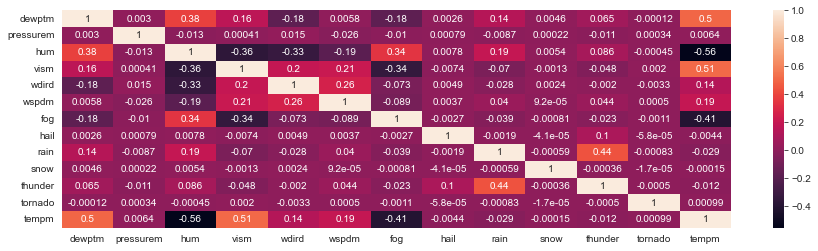

In [20]:
plt.figure(figsize=(15,4))
sns.heatmap(df[num_cols + cat_cols + [target_col]].corr(),annot=True)
plt.show()

In [22]:
feats = ['dewptm','vism','hum']

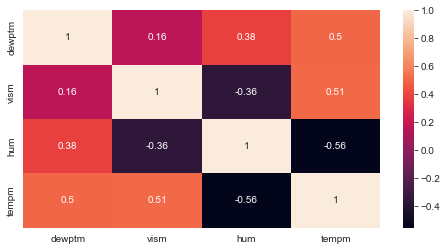

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(df[feats + [target_col]].corr(),annot=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df[feats], df[target_col], 
                    test_size=0.25, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_lin = LinearRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)
model_rf = RandomForestRegressor().fit(xtrain,ytrain)

print('Linear Model (Train): ', round(model_lin.score(xtrain,ytrain)*100,1),'%')
print('Linear Model (Test): ', round(model_lin.score(xtest,ytest)*100,1),'%')

print('Decision Tree (Train): ', round(model_dt.score(xtrain,ytrain)*100,1),'%')
print('Decision Tree (Test): ', round(model_dt.score(xtest,ytest)*100,1),'%')

print('RF Model (Train): ', round(model_rf.score(xtrain,ytrain)*100,1),'%')
print('RF Model (Test): ', round(model_rf.score(xtest,ytest)*100,1),'%')

Linear Model (Train):  91.0 %
Linear Model (Test):  91.2 %
Decision Tree (Train):  99.1 %
Decision Tree (Test):  98.5 %
RF Model (Train):  99.1 %
RF Model (Test):  98.6 %


### DAY 28

In [26]:
pd.DataFrame(model_rf.feature_importances_, columns=['imp'], index=xtrain.columns).sort_values(by='imp',ascending=False)

,imp
hum,0.361816
vism,0.344699
dewptm,0.293485


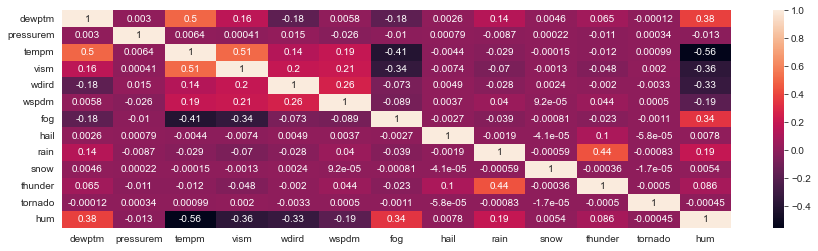

In [27]:
target_col_h = 'hum'
cat_cols_h = ['fog', 'hail','rain', 'snow','thunder', 'tornado',]
num_cols_h = ['dewptm', 'pressurem', 'tempm',  'vism', 'wdird', 'wspdm']

plt.figure(figsize=(15,4))
sns.heatmap(df[num_cols_h + cat_cols_h + [target_col_h]].corr(),annot=True)
plt.show()

In [28]:
feats_h = ['dewptm','tempm','vism','fog']
xtrain_h, xtest_h, ytrain_h, ytest_h = train_test_split(df[feats_h], df[target_col_h], 
                    test_size=0.25, random_state=101)

model_lin_h = LinearRegression().fit(xtrain_h,ytrain_h)
model_dt_h = DecisionTreeRegressor().fit(xtrain_h,ytrain_h)
model_rf_h = RandomForestRegressor().fit(xtrain_h,ytrain_h)

print('Linear Model (Train): ', round(model_lin_h.score(xtrain_h,ytrain_h)*100,1),'%')
print('Linear Model (Test): ', round(model_lin_h.score(xtest_h,ytest_h)*100,1),'%')

print('Decision Tree (Train): ', round(model_dt_h.score(xtrain_h,ytrain_h)*100,1),'%')
print('Decision Tree (Test): ', round(model_dt_h.score(xtest_h,ytest_h)*100,1),'%')

print('RF Model (Train): ', round(model_rf_h.score(xtrain_h,ytrain_h)*100,1),'%')
print('RF Model (Test): ', round(model_rf_h.score(xtest_h,ytest_h)*100,1),'%')

Linear Model (Train):  90.3 %
Linear Model (Test):  90.4 %
Decision Tree (Train):  99.0 %
Decision Tree (Test):  98.7 %
RF Model (Train):  99.0 %
RF Model (Test):  98.7 %


In [29]:
pd.DataFrame(model_rf_h.feature_importances_, columns=['imp'], index=xtrain_h.columns).sort_values(by='imp',ascending=False)

,imp
tempm,0.538469
dewptm,0.421277
fog,0.026135
vism,0.014119


In [30]:
pd.to_pickle(model_rf,'TemperaturePrediction.pickle')
pd.to_pickle(model_rf_h,'HumidityPrediction.pickle')